In [1]:
import os

## switch to the root dir

In [2]:
os.chdir('..')
os.listdir()

['media',
 'home',
 'srv',
 'etc',
 'usr',
 'tmp',
 'boot',
 'lib64',
 'mnt',
 'dev',
 'sys',
 'run',
 'root',
 'bin',
 'proc',
 'var',
 'sbin',
 'lib',
 'opt',
 'content',
 '.dockerenv',
 'datalab',
 'tools',
 'tensorflow-1.15.2',
 'lib32',
 'python-apt']

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/6321_project')
os.listdir()

['processed_data',
 'trainers',
 'models',
 'data_processor',
 'data_loader',
 'jupyter',
 'loggers',
 'saved_models',
 'model']

In [5]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.MusicCNN2d import MusicCNN2d_1CNNBlock
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn

## Load preprocessed data

In [6]:
X_train, y_train, X_val, y_val = load_numpy_arrays(['data_train_X.npy','data_train_y.npy', 'data_val_X.npy','data_val_y.npy']
                  , path_prefix='processed_data/processed_waves/10-genres/')

In [7]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [8]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [9]:
print(X_train.shape)
print(y_train.shape)

torch.Size([1598, 501, 40])
torch.Size([1598])


In [10]:
print(X_train[0])
print(y_train[0])

tensor([[-2.2515, -1.9039, -1.6231,  ..., -2.0267, -1.9376, -1.7817],
        [-1.4637, -1.7655, -1.9270,  ..., -1.4429, -1.5084, -1.7305],
        [-1.7726, -2.1026, -2.2693,  ..., -1.8113, -1.7369, -1.7406],
        ...,
        [-0.0146, -0.0134, -0.1776,  ..., -1.3860, -1.6582, -1.5008],
        [ 0.0930,  0.1538, -0.0341,  ..., -1.1890, -1.5168, -1.6089],
        [-0.1187, -0.2323, -0.3049,  ..., -1.4563, -1.3284, -1.3372]])
tensor(2)


In [11]:
print(X_val.shape)
print(y_val.shape)

torch.Size([200, 501, 40])
torch.Size([200])


## Load model

1. define model under the folder models
2. import and define the model

In [12]:
model = MusicCNN2d_1CNNBlock(10, 16, 20000)

In [13]:
n_feat = X_train.shape[2]
n_time = X_train.shape[1]

In [14]:
X_a = X_train[:10].reshape((-1, 1, n_time, n_feat))
print(X_a.shape)
pred = model(X_a)
print(pred.shape)

torch.Size([10, 1, 501, 40])
torch.Size([10, 10])


## Define loss and optimizer

In [15]:
lr = 0.001
batch_size = 300
num_epoch = 50
model_name = 'CNN2d_1CNNBlock'
saved_model_name = 'saved_models/saved_' + model_name + '_wave.pt'

In [16]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [17]:
X_train_2d = X_train.reshape((-1, 1, n_time, n_feat))
#print(X_train.shape)
X_val_2d = X_val.reshape((-1, 1, n_time, n_feat))
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train_2d, y_train, X_val_2d, y_val), 
                  loss, optimizer, batch_size = batch_size, num_epoch = num_epoch, device='cuda', saved_model_name=saved_model_name)

Epoch  0: loss on final training batch: 14.7428
training accuracy: 15.52% validation accuracy: 15.50%
Epoch  1: loss on final training batch: 3.1810
training accuracy: 14.46% validation accuracy: 17.00%
Epoch  2: loss on final training batch: 2.1971
training accuracy: 16.08% validation accuracy: 17.50%
Epoch  3: loss on final training batch: 1.9788
training accuracy: 28.16% validation accuracy: 32.50%
Epoch  4: loss on final training batch: 1.8932
training accuracy: 28.60% validation accuracy: 29.00%
Epoch  5: loss on final training batch: 1.7398
training accuracy: 33.92% validation accuracy: 34.00%
Epoch  6: loss on final training batch: 1.6057
training accuracy: 35.61% validation accuracy: 36.00%
Epoch  7: loss on final training batch: 1.5069
training accuracy: 40.24% validation accuracy: 38.50%
Epoch  8: loss on final training batch: 1.4114
training accuracy: 43.43% validation accuracy: 43.00%
Epoch  9: loss on final training batch: 1.3483
training accuracy: 46.93% validation accura

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

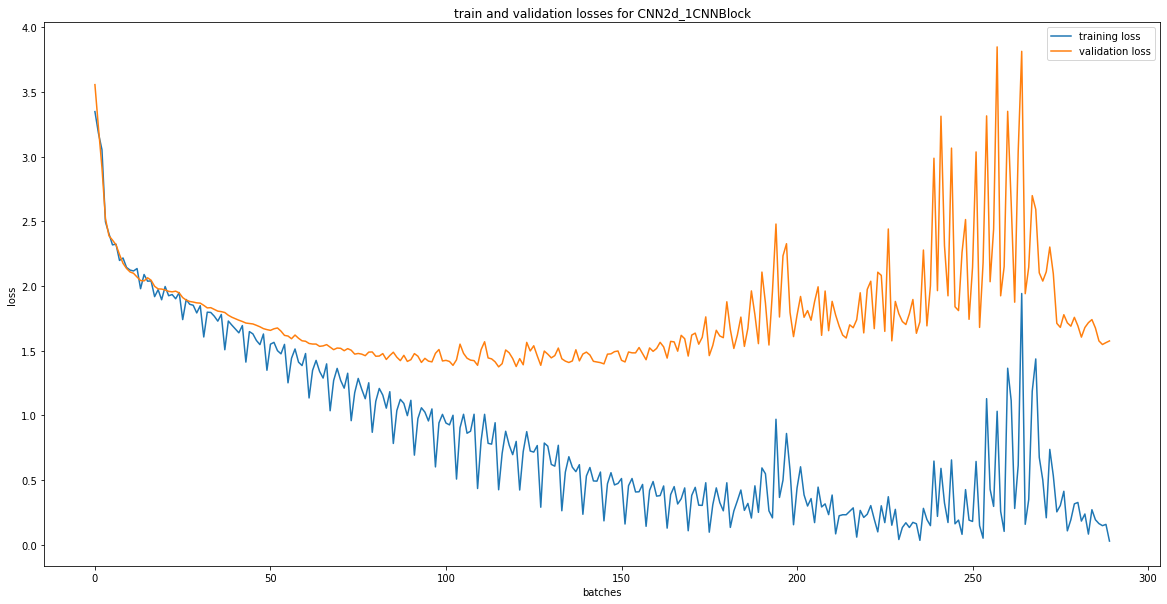

In [18]:
plot_numerical_arrays([training_loss_array[10:], validation_loss_array[10:]], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

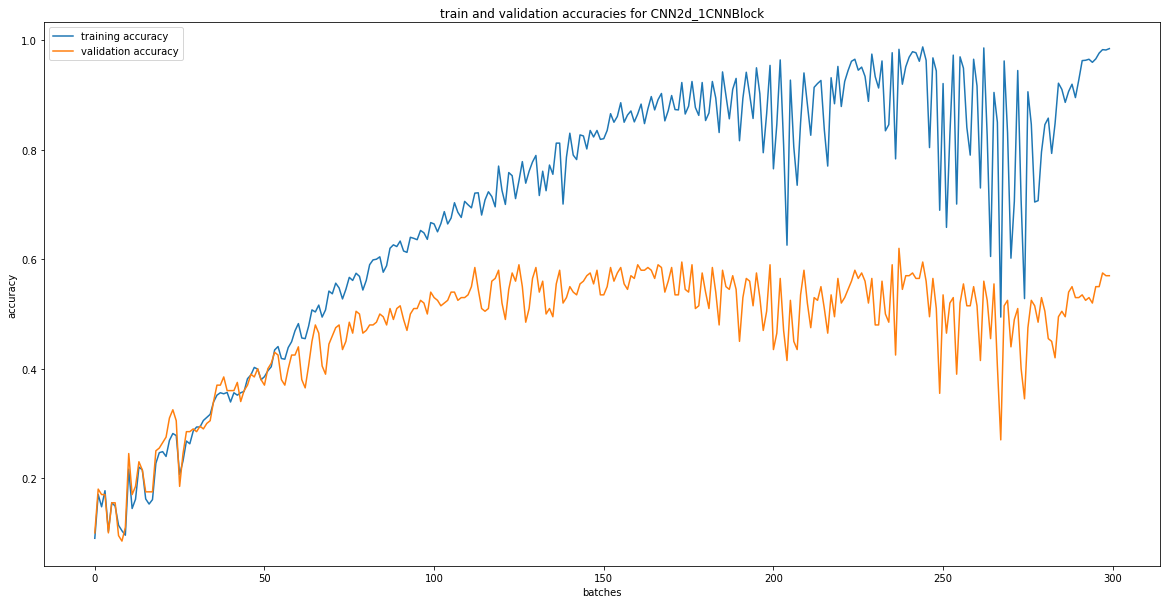

In [19]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for ' + model_name)